## Loading Dataset

In [12]:
import pandas as pd

df = pd.read_csv("land_price_2.csv")

df.head()

,land_area,price
0,129,140.9
1,214,200.3
2,343,280.4
3,387,298.8
4,454,358.2


In [13]:
df.shape

(30, 2)

## Visualizing Dataset

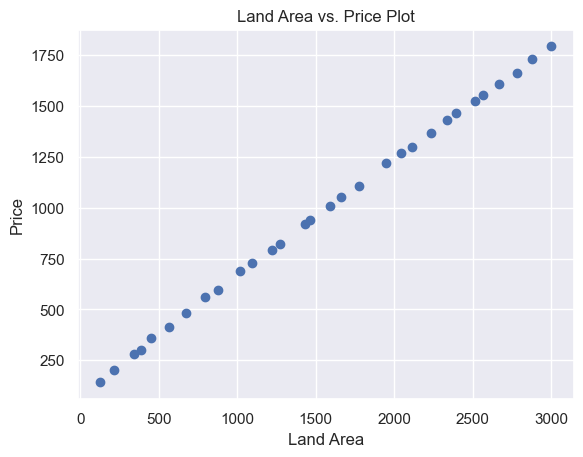

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.scatter(df['land_area'], df['price'])
plt.xlabel("Land Area")
plt.ylabel("Price")
plt.title("Land Area vs. Price Plot")
plt.show()

## Separate X and y, then Scale X

In [15]:
import numpy as np

X = df['land_area']
y = df['price']
m = len(y)

X_scale = (X - np.mean(X, axis=0)) / (np.std(X, axis=0))

X_scale[:5]

0   -1.641142
1   -1.542854
2   -1.393687
3   -1.342809
4   -1.265335
Name: land_area, dtype: float64

## Concate X

In [16]:
X_b = np.c_[np.ones(m), X_scale]

In [17]:
X_b[:5]

array([[ 1.        , -1.64114232],
       [ 1.        , -1.54285417],
       [ 1.        , -1.39368744],
       [ 1.        , -1.34280887],
       [ 1.        , -1.26533468]])

## Define Function

In [18]:
# Define Function
def hyp(X, theta):
    return X.dot(theta)

def cost(y_hat, y):
    y_hat = hyp(X_b, theta)
    return np.sum((y_hat- y)**2) / (2 * m)

def grad(y_hat, y):
    return X_b.T.dot(y_hat - y) / m

## Training

In [19]:
# Training
lr = 1e-3
epochs = 5000
theta = np.zeros(2)
cost_lst = []

for epoch in range(1, epochs+1):
    y_hat = hyp(X_b, theta)
    grad_ = grad(y_hat, y)
    theta -= lr * grad_
    cost_ = cost(y_hat, y)
    cost_lst.append(cost_)
    print(f"Epoch: {epoch:03d}, Cost: {cost_:.4f}")

Epoch: 001, Cost: 598722.5539
Epoch: 002, Cost: 597525.8189
Epoch: 003, Cost: 596331.4762
Epoch: 004, Cost: 595139.5210
Epoch: 005, Cost: 593949.9485
Epoch: 006, Cost: 592762.7539
Epoch: 007, Cost: 591577.9326
Epoch: 008, Cost: 590395.4797
Epoch: 009, Cost: 589215.3905
Epoch: 010, Cost: 588037.6603
Epoch: 011, Cost: 586862.2844
Epoch: 012, Cost: 585689.2581
Epoch: 013, Cost: 584518.5767
Epoch: 014, Cost: 583350.2354
Epoch: 015, Cost: 582184.2297
Epoch: 016, Cost: 581020.5548
Epoch: 017, Cost: 579859.2061
Epoch: 018, Cost: 578700.1790
Epoch: 019, Cost: 577543.4687
Epoch: 020, Cost: 576389.0707
Epoch: 021, Cost: 575236.9803
Epoch: 022, Cost: 574087.1930
Epoch: 023, Cost: 572939.7041
Epoch: 024, Cost: 571794.5090
Epoch: 025, Cost: 570651.6032
Epoch: 026, Cost: 569510.9820
Epoch: 027, Cost: 568372.6409
Epoch: 028, Cost: 567236.5754
Epoch: 029, Cost: 566102.7809
Epoch: 030, Cost: 564971.2528
Epoch: 031, Cost: 563841.9867
Epoch: 032, Cost: 562714.9779
Epoch: 033, Cost: 561590.2221
Epoch: 034

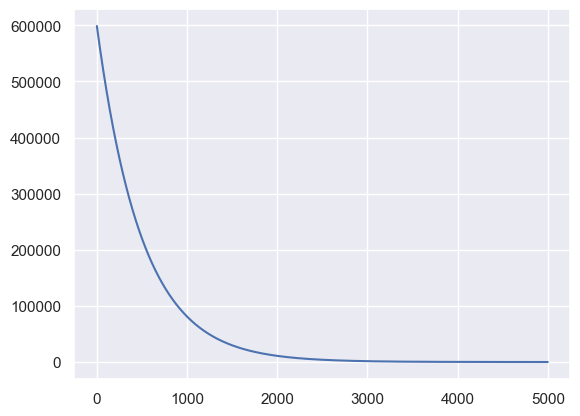

In [20]:
plt.plot(cost_lst)

In [21]:
print(theta)

[971.08241582 490.56905575]


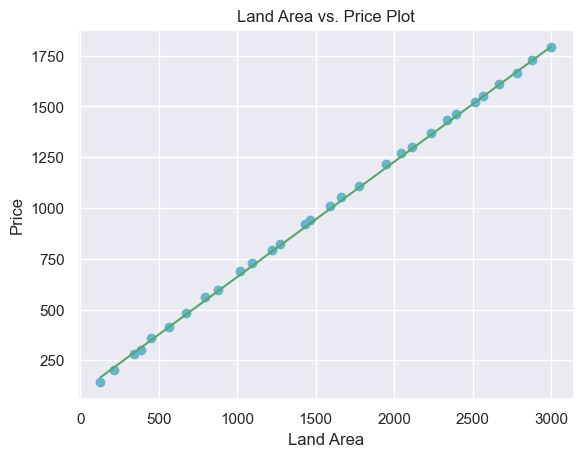

In [24]:
plt.scatter(df['land_area'], df['price'], c='c')

plt.plot(X, theta[0] + theta[1]*(X - np.mean(X, axis=0))/np.std(X, axis=0), c='g')

plt.xlabel("Land Area")
plt.ylabel("Price")
plt.title("Land Area vs. Price Plot")
plt.show()